# Healthcare Insurance Expenses

## Getting Started

### Requirements
* Anaconda - On Windows OS install and add to root path. 
* Python 3
* VS Code (Optional)
* Necessary Libraries (numpy, pandas, matplotlib, seaborn, Scikit Learn)

### Import Libraries

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data cleaning

In [11]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Checking for duplicated values

data.duplicated().sum()

1

In [13]:
# Dropping any duplicated values

data.drop_duplicates(inplace=True)

In [14]:
# Checking if there are any duplicate values

data.duplicated().sum()

0

In [15]:
# Checking our data

data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis
### Univariate Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\2115336833.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


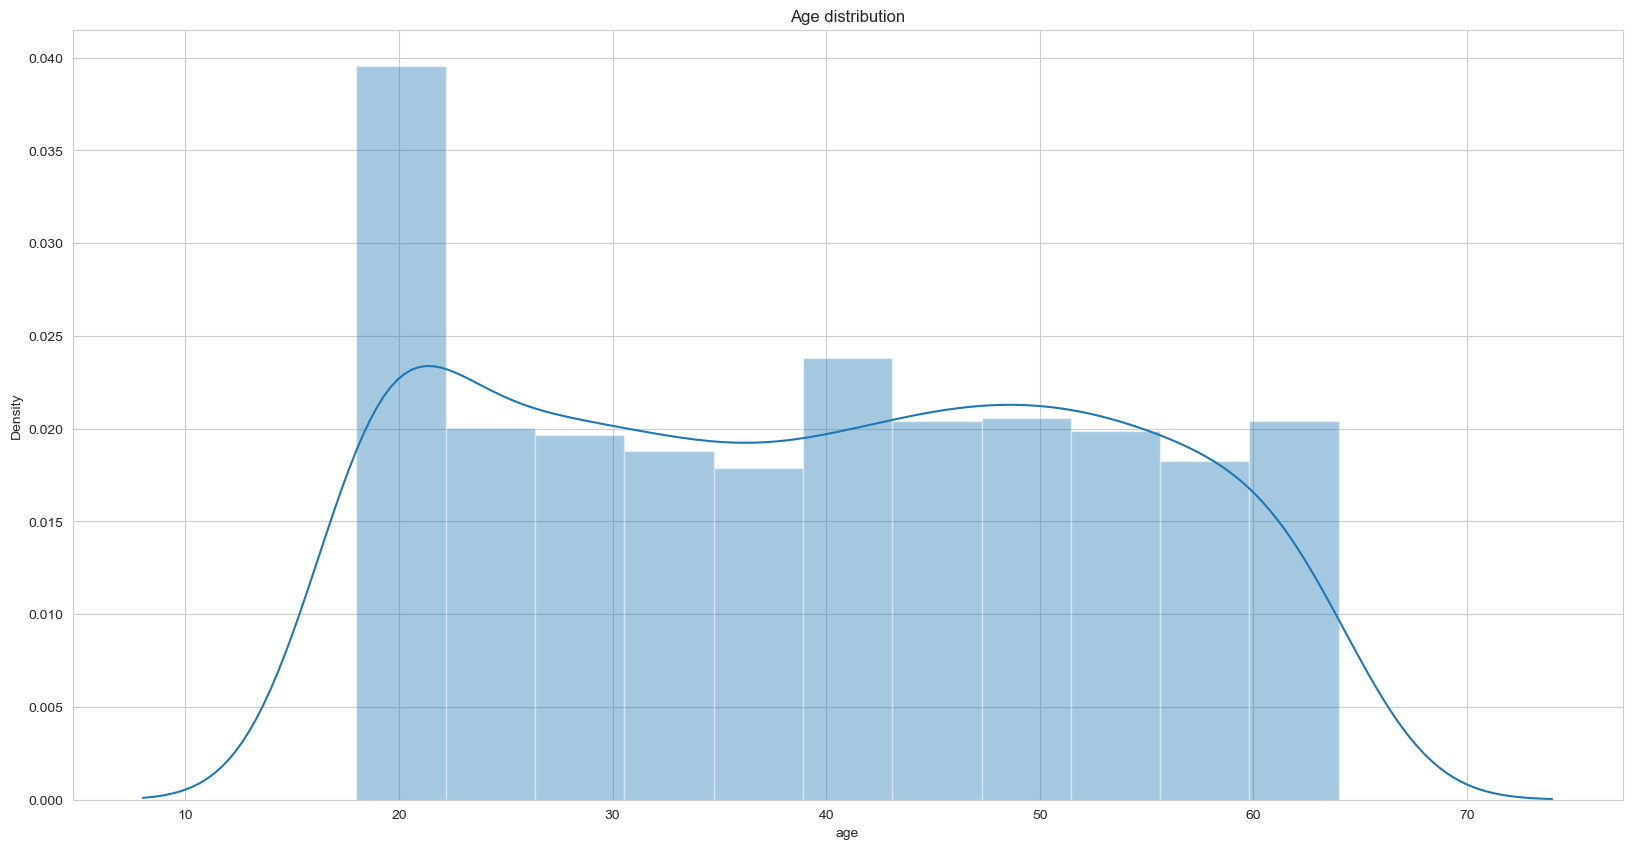

In [23]:
# Using graphs to show the distribution of age and bmi

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.distplot(data['age'])

plt.title("Age distribution")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\3697768169.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


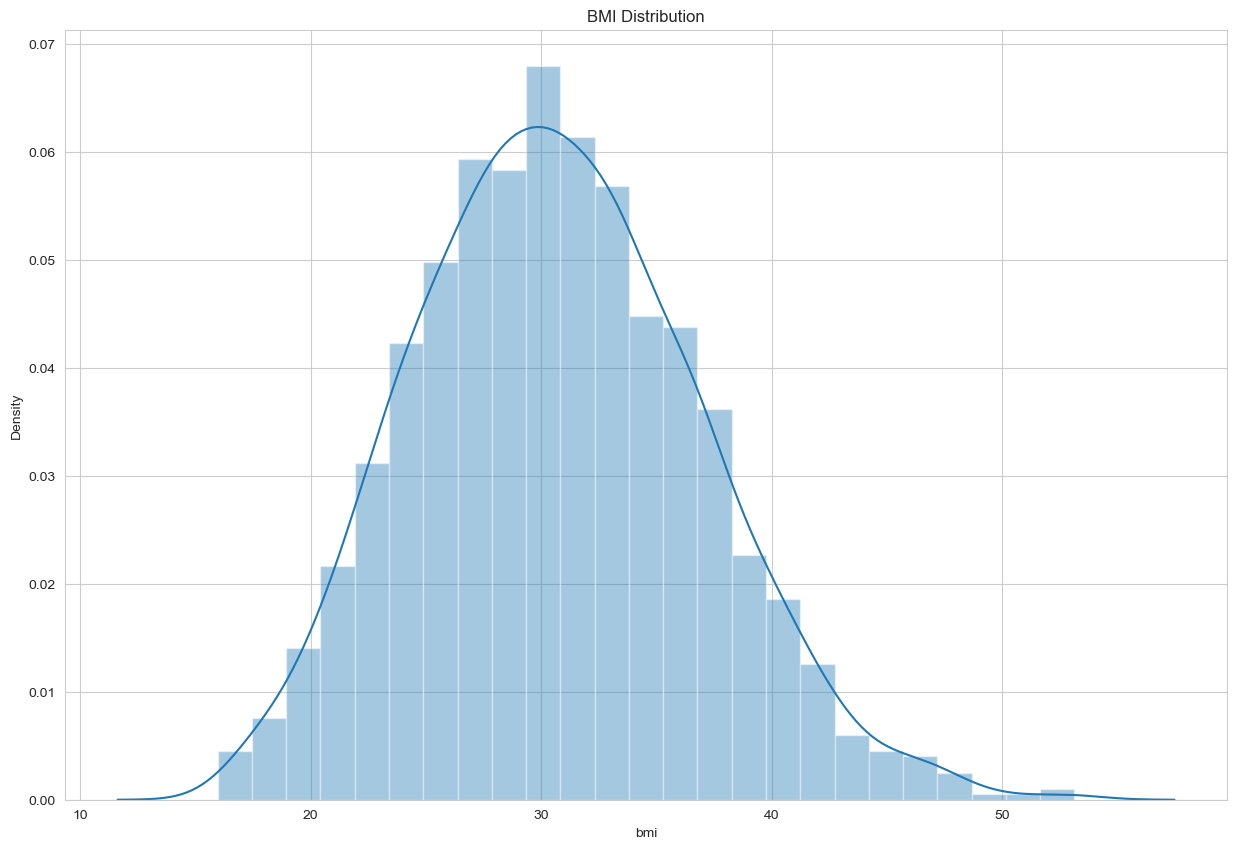

In [27]:
# Creating a distplot for bmi

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.bmi)
plt.title('BMI Distribution')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\3329017872.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.charges)


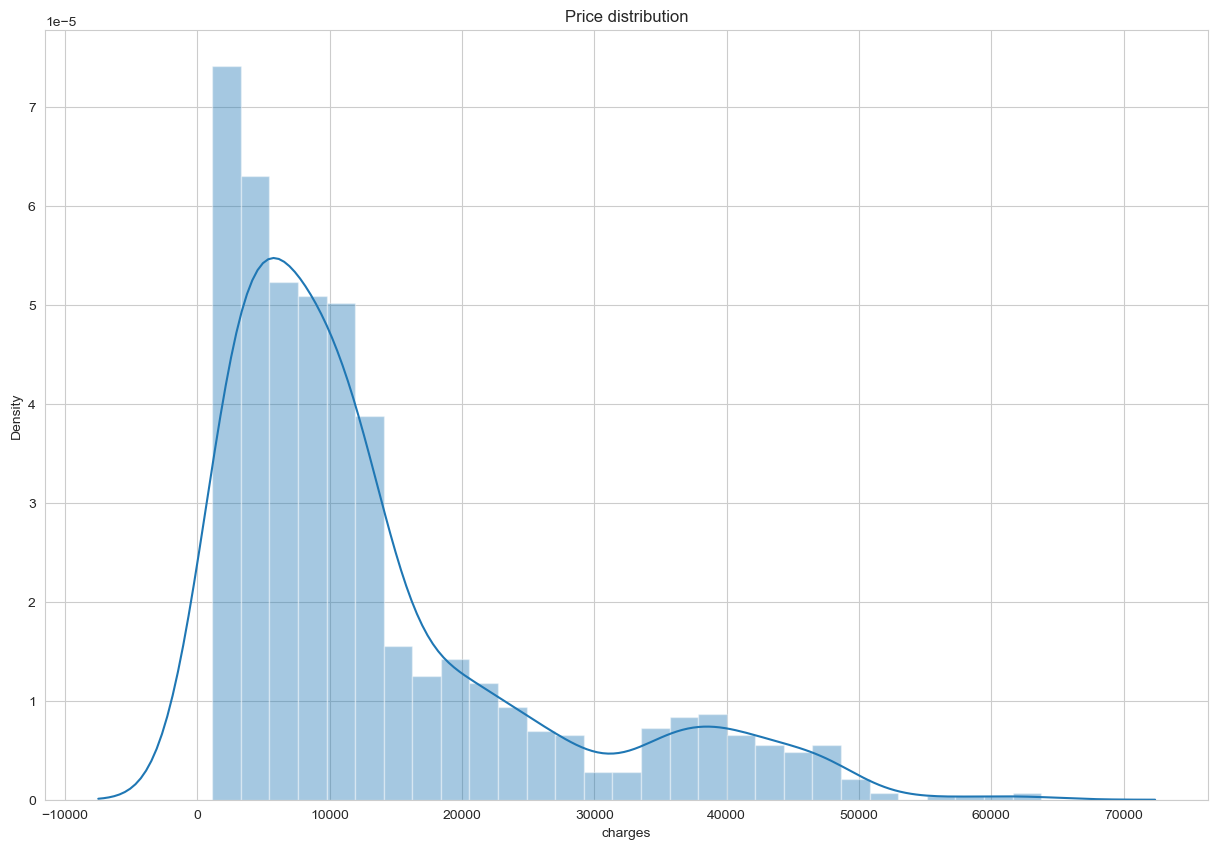

In [29]:
# Creating a distplot to see the price distribution

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.charges)
plt.title('Price distribution')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6488\260267639.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.children)


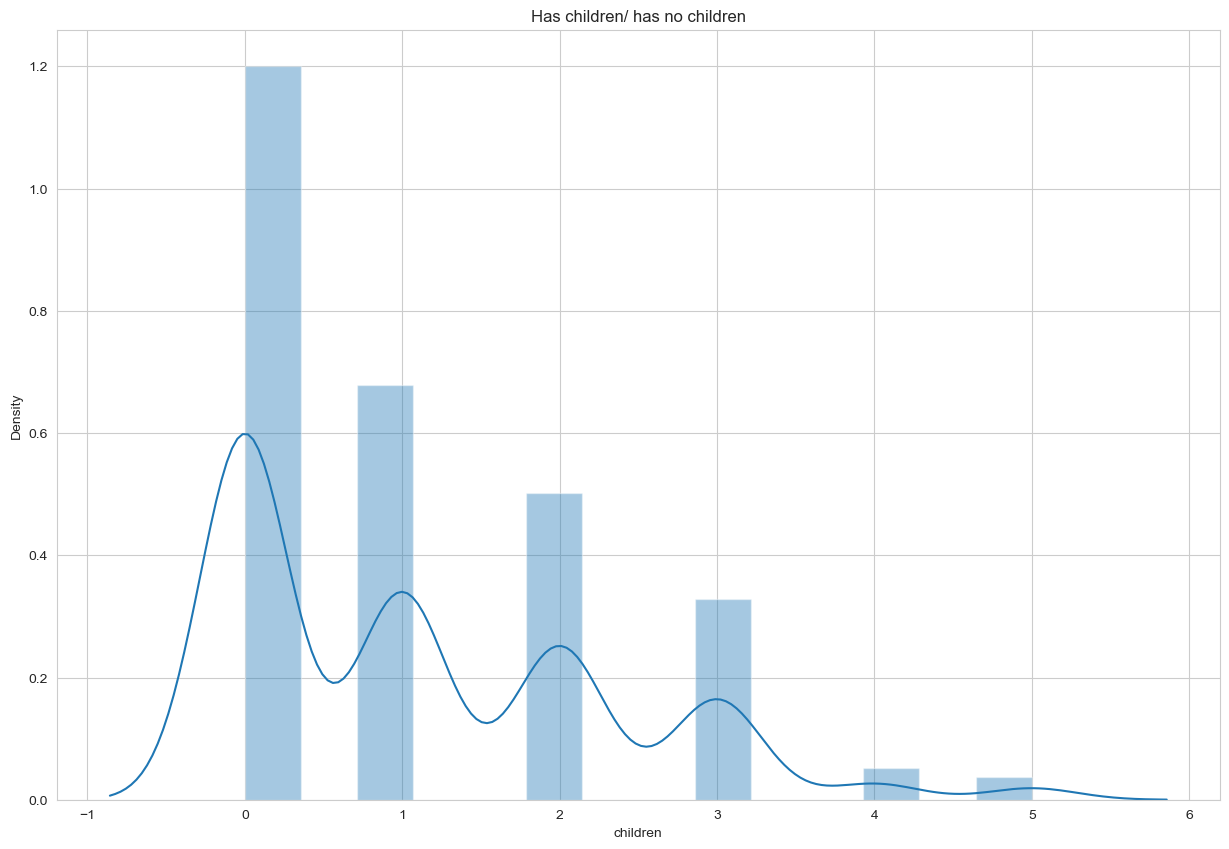

In [30]:
# Checking for the distribution of patients with children

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.children)
plt.title('Has children/ has no children')
plt.show()

In [32]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Categorical plots

In [33]:
def Categorical_plot(column): 
    
    plt.figure(figsize=(20, 5)) # make figure
    plt.subplot(1,2,1)
    pd.value_counts(data[column]).plot(kind='bar')
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.ylabel("Count\n", fontsize=15)    
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Count\n", fontsize = 15)
    
    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"{str(column)} - Age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)
    
    plt.show()
    print()
    


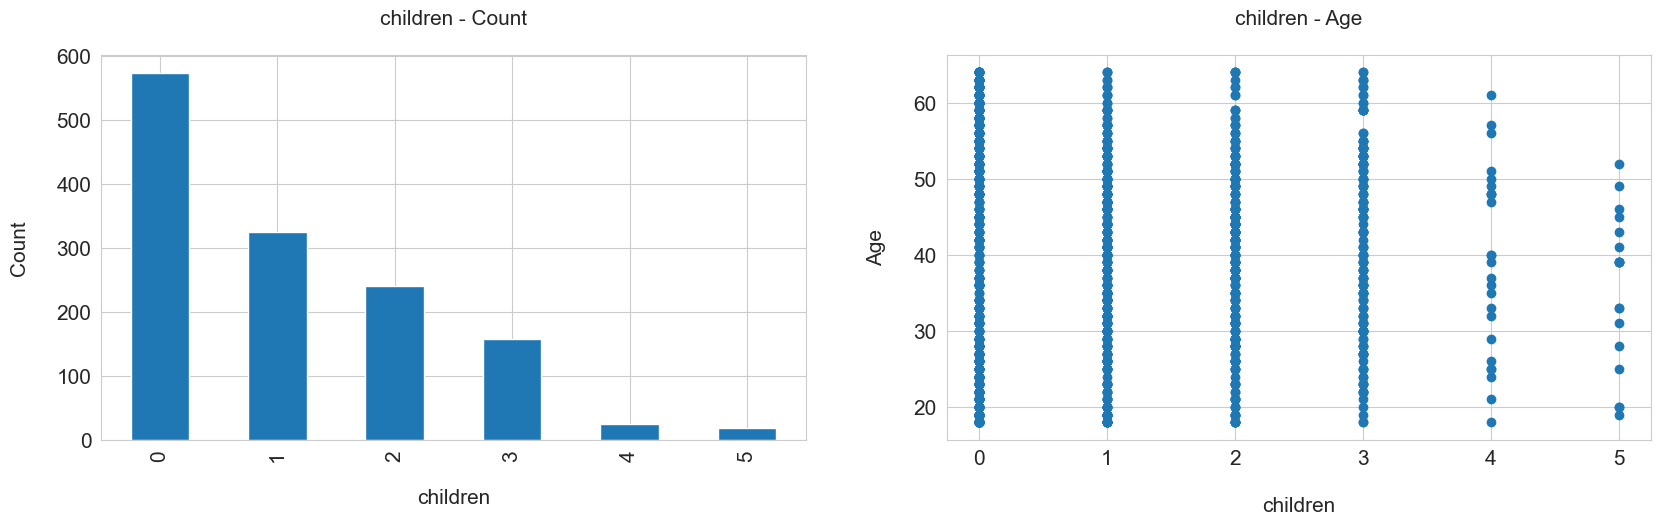

In [35]:
Categorical_plot("children")

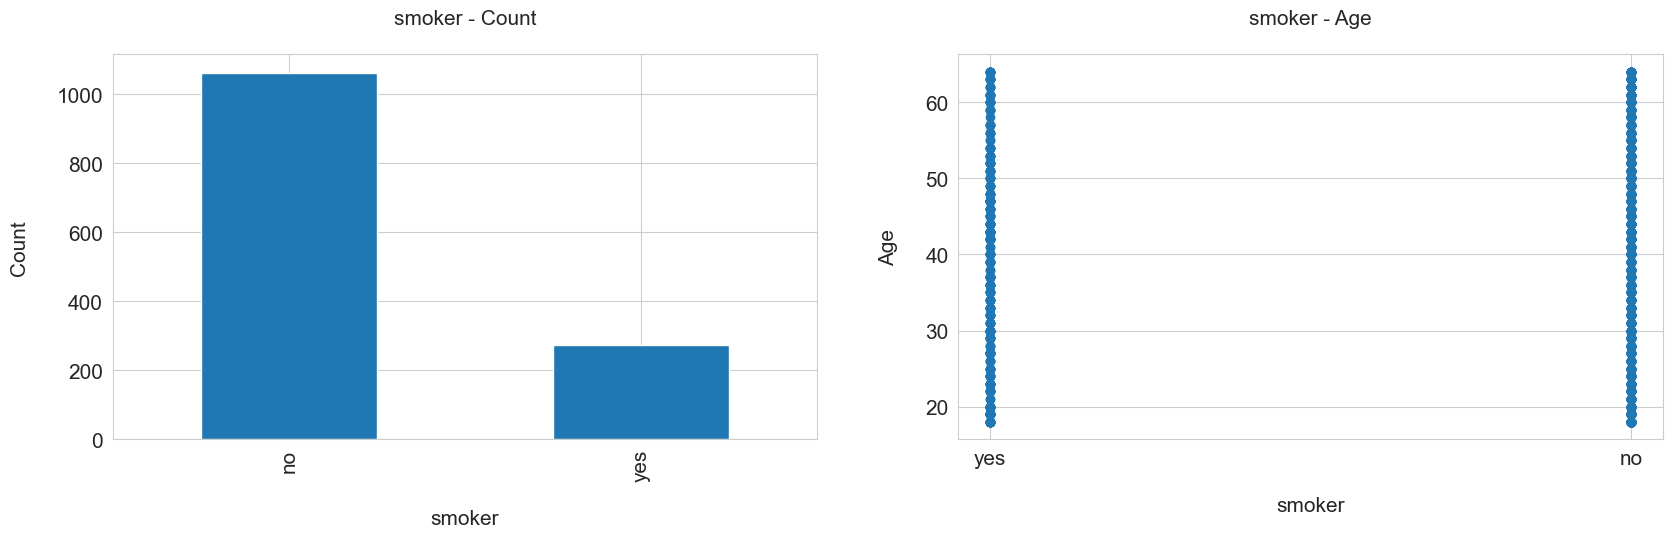

In [41]:
Categorical_plot("smoker")

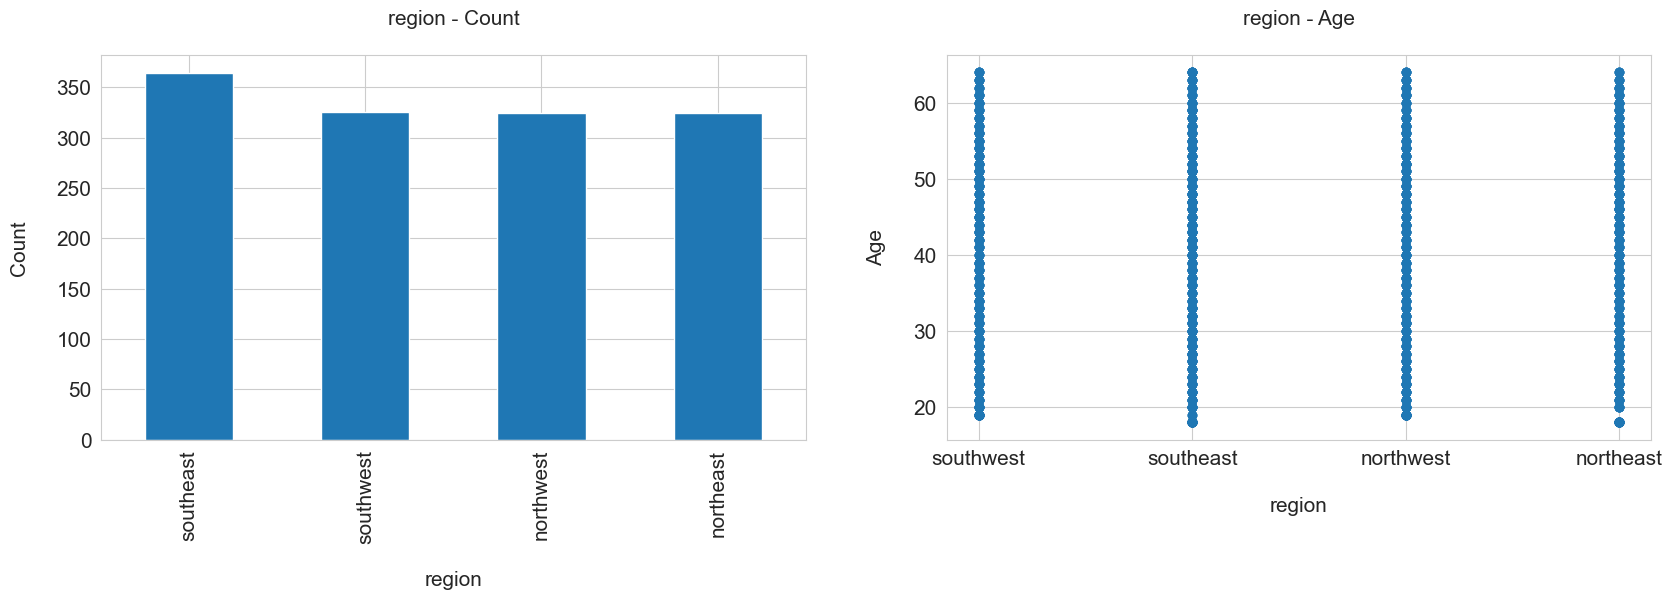

In [40]:
Categorical_plot("region")

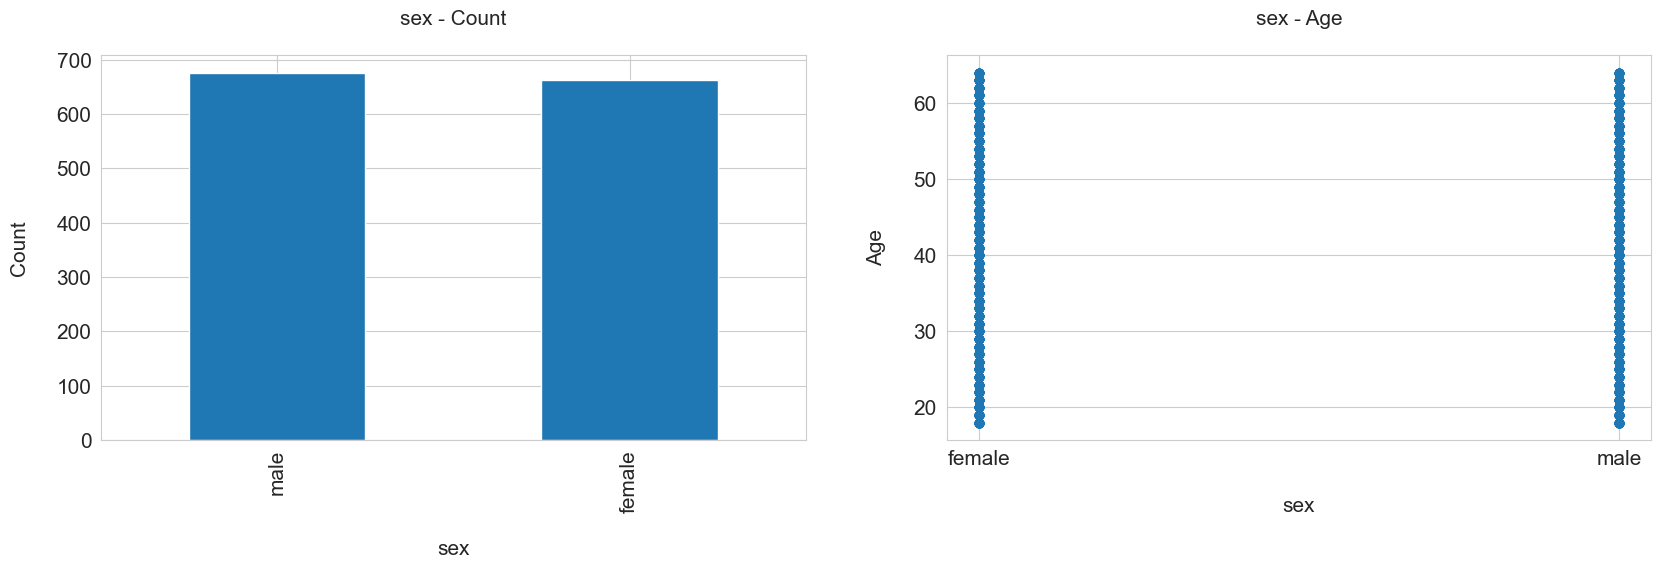

In [39]:
Categorical_plot("sex")